# Matplotlib: Pie Plots

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Example 1 - Pie Charts Great for Boolean values 

### Compare Job Posting Work from Home Status

* Starting Angle of 0 degrees is far right center of pie chart
* Focus should start at upper middle of chart with starting angle of 90 degrees which runs middle of chart to top center
* Display percentages and format with [Format Specification Mini-Language](https://docs.python.org/3/library/string.html#format-string-syntax)

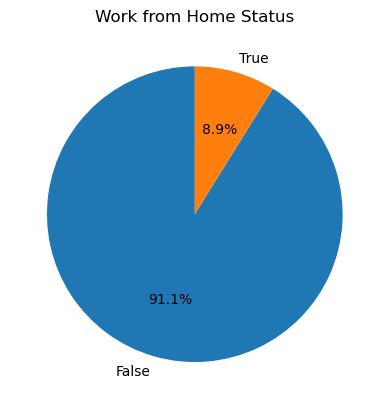

In [12]:
# Format as a percentage with a minimum of 1 whole number and 1 decimal place. Number should be a float(f) and add percentage symbol to end(%%)
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

## Example 2: Pie charts aren't great when comparing many values

### Not a great fit: Compariing Job Title Counts

#### Hard to compare values against each other

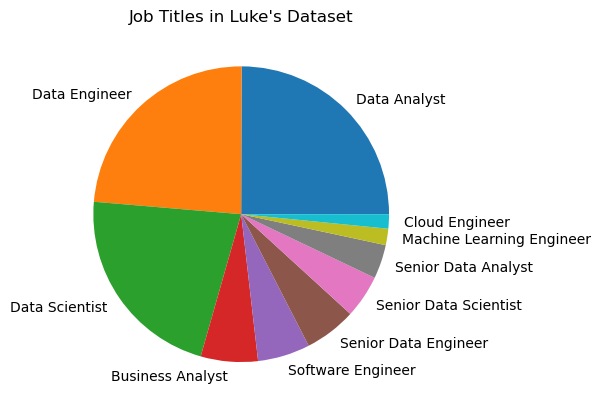

In [7]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title("Job Titles in Luke's Dataset")
plt.ylabel("")
plt.show()

### Better fit for same dataset

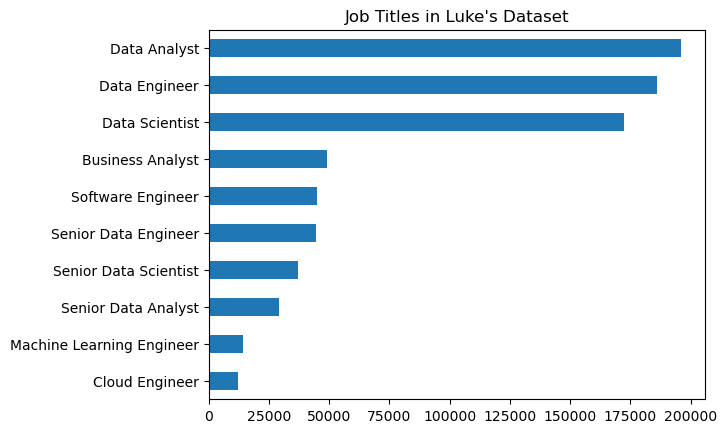

In [8]:
df['job_title_short'].value_counts().plot(kind='barh')
plt.title("Job Titles in Luke's Dataset")
plt.gca().invert_yaxis()
plt.ylabel("")
plt.show()

## Example 3: Multiple pie chart data points with subplots

### Plot Job Work From Home, Job No Degree Mentioned, Job Health Insurance on one figure

In [16]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


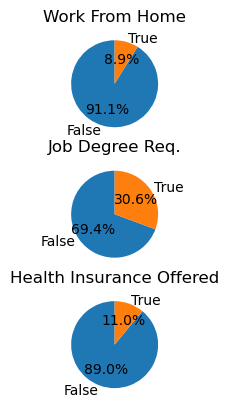

In [36]:
# Column_name:Chart Title
dict_columns = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig_num_rows = len(dict_columns)
fig_num_columns = 1

fig, ax = plt.subplots(fig_num_rows, fig_num_columns)

for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)


plt.show()

# Problems

In [46]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Health Insurance Pie Chart (2.14.1) - Problem

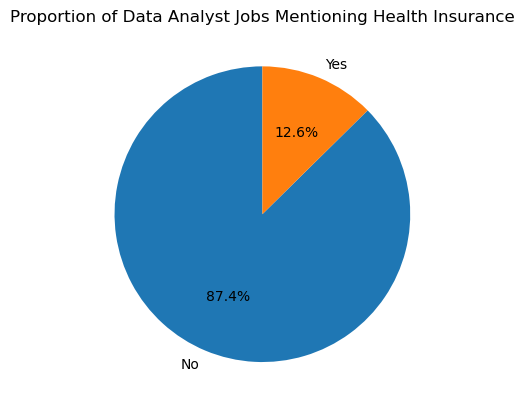

In [47]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_DA['job_health_insurance'].value_counts().plot(
    kind='pie', 
    title='Proportion of Data Analyst Jobs Mentioning Health Insurance',
    startangle=90,
    autopct='%1.1f%%',
    labels=['No', 'Yes'])
plt.ylabel('')
plt.show()

##  Job Schedule Distribution (2.14.2) - Problem

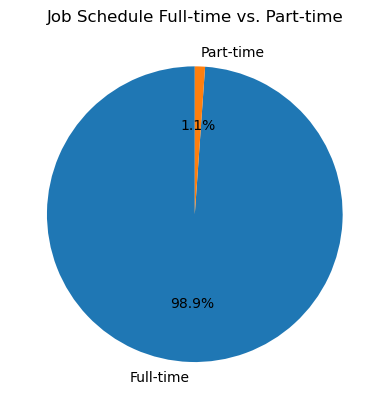

In [ ]:
df_ft_pt = df[(df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Part-time')].copy()


ft_pt_counts = df_ft_pt['job_schedule_type'].value_counts()

plt.pie(
    ft_pt_counts,
    startangle=90,
    autopct='%1.1f%%',
    labels=ft_pt_counts.index)

plt.title('Job Schedule Full-time vs. Part-time')

plt.show()

## Degree Mentioned Pie Chart (2.14.3) - Problem

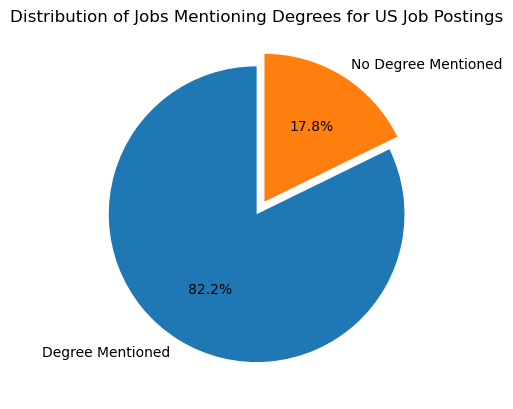

In [68]:
df_US = df[df['job_country'] == 'United States'].copy()

# Explode out the second value in the pie chart.  In this case the True values
explode = (0,0.1)
labels = ['Degree Mentioned', 'No Degree Mentioned']

us_no_degree_mentioned_counts = df_US['job_no_degree_mention'].value_counts()

plt.pie(
    us_no_degree_mentioned_counts,
    startangle=90,
    autopct='%1.1f%%',
    labels=labels,
    explode=explode)

plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')

plt.show()